In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
os.chdir("C:/Users/16472/Desktop/BlastTNG_Compression")
from astropy.io import fits
from scipy import signal

# HOME Index and Times.

# Start Index
    
#     7035032
#     7192434
#     7377037
#     7472238
#     7847344
    
# End Index

# 12:52:51
# 13:06:07
# 13:18:05
# 13:49:41
# 14:05:43
# 15:09:14

# True Home indices are aout 36000000 to 46000000 based on ctime calculations
# We found that for when we pointed at HOME, the Ctime index is roughly 3.6e8 to 4.6e, look at KID files between these indices

# INDICES 
# phase1, time1 : 36000000 to 39000000
# phase2, time2 : 39000000 to 42000000

In [3]:
def get_statistics(data_array, data_array_2=None):
    """
    Helper Function used to gather basic statistics about data arrays
    """
    results = "The MEAN is: " + str(np.mean(data_array)) +\
                 "\nThe STANDARD DEVIATION is: " + str(np.std(data_array)) +\
                    "\nThe MAX and MIN are: " + str(np.max(data_array)) + ', ' + str(np.min(data_array))
    if data_array_2 is not None:
        comp_results = "The comp. MEAN is: " + str(np.mean(data_array_2)) +\
                 "\nThe comp. STANDARD DEVIATION is: " + str(np.std(data_array_2)) +\
                    "\nThe comp. MAX and MIN are: " + str(np.max(data_array_2)) + ' ' + str(np.min(data_array_2))
        return (results, comp_results)
    return results

def show_plot(x, y, xlab='', ylab='', title=''):
    plt.figure(figsize = (16, 12))
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.plot(x, y)
    plt.show()

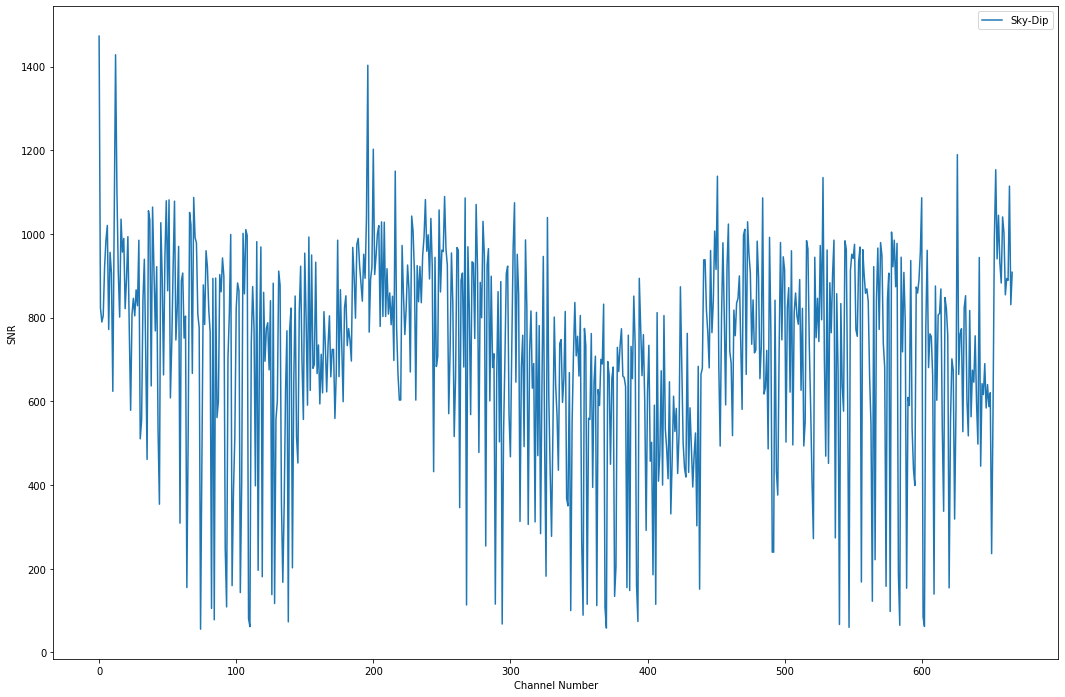

(array([74], dtype=int64),)
55.73840178113199


In [4]:
snr_sky_350 = np.load("snr_skydip_350_.npy")
plt.figure(figsize=(18,12))
plt.plot(snr_sky_350,label="Sky-Dip")
plt.ylabel("SNR")
plt.xlabel("Channel Number")
plt.legend()
plt.show()

print(np.where(snr_sky_350 == min(snr_sky_350)))
print(snr_sky_350[74])


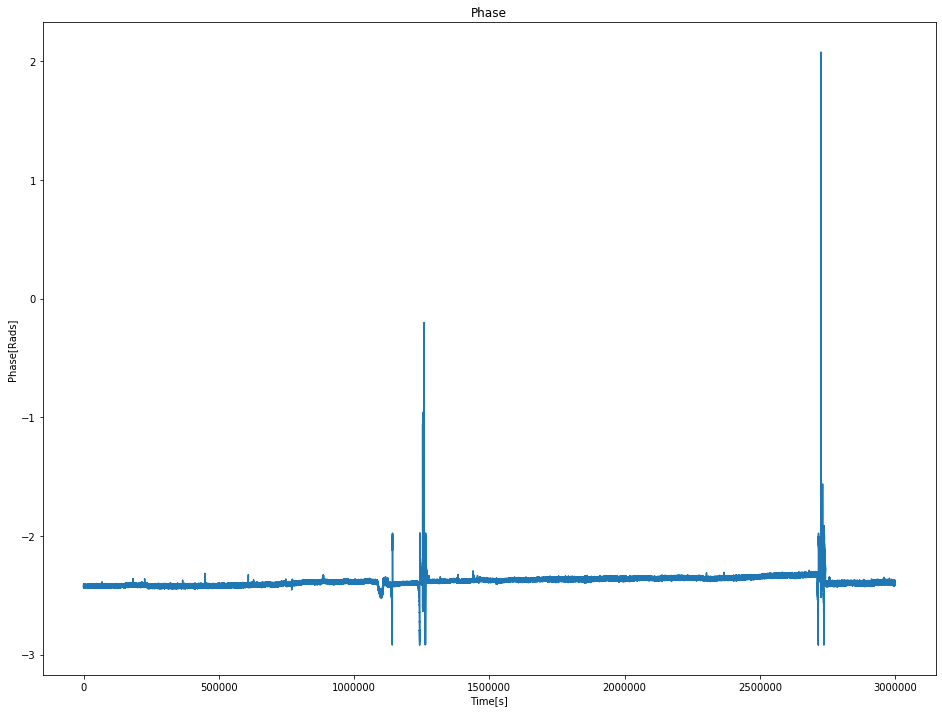

For Phase


In [9]:
# We want to look around channel 100-105 per say?

# Load Files here
# 
# print("First sample taken at 32780000, Last sample taken at 32784869 (For Phase)") 
#
# Lets look at channel 74 here.

phase2 = np.load("phase_detector74.npy")

show_plot(np.arange(len(phase)), phase.astype(dtype='float32'), "Time[s]", 'Phase[Rads]',"Phase")
print("For Phase")
# print(get_statistics(phase.astype(dtype='float32')[:10000]))


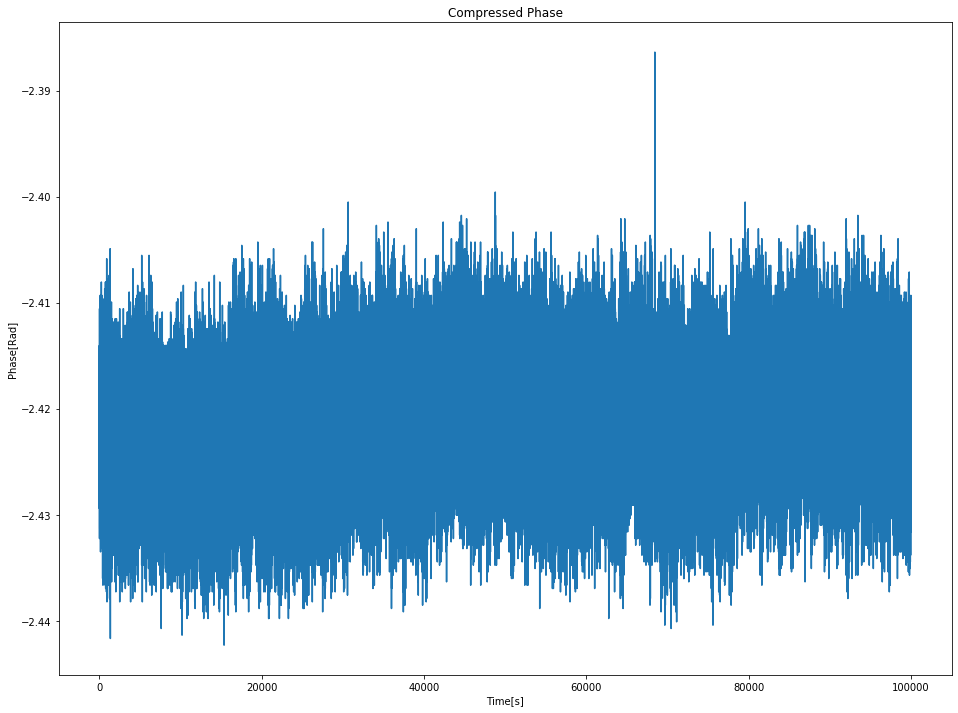

The MEAN is: -2.4213383
The STANDARD DEVIATION is: 0.005809638
The MAX and MIN are: -2.386375, -2.4422884


In [14]:
# Lets get the compressed file

# Okay, let's investigate all this post compression 
# Lets only care about the second plot

# fits.writeto("chn74.fits", phase.astype(dtype='float32')[:10000])
fits.CompImageHDU(data=phase.astype(dtype='float32')[:100000], compression_type='RICE_1').writeto("chn74_comp.fits", overwrite=True)
comp_phase_2 = fits.getdata("chn74_comp.fits")

# What does the Compressed Phase look like?
show_plot(np.arange(100000), comp_phase_2, 'Time[s]', 'Phase[Rad]', 'Compressed Phase')
print(get_statistics(comp_phase_2))

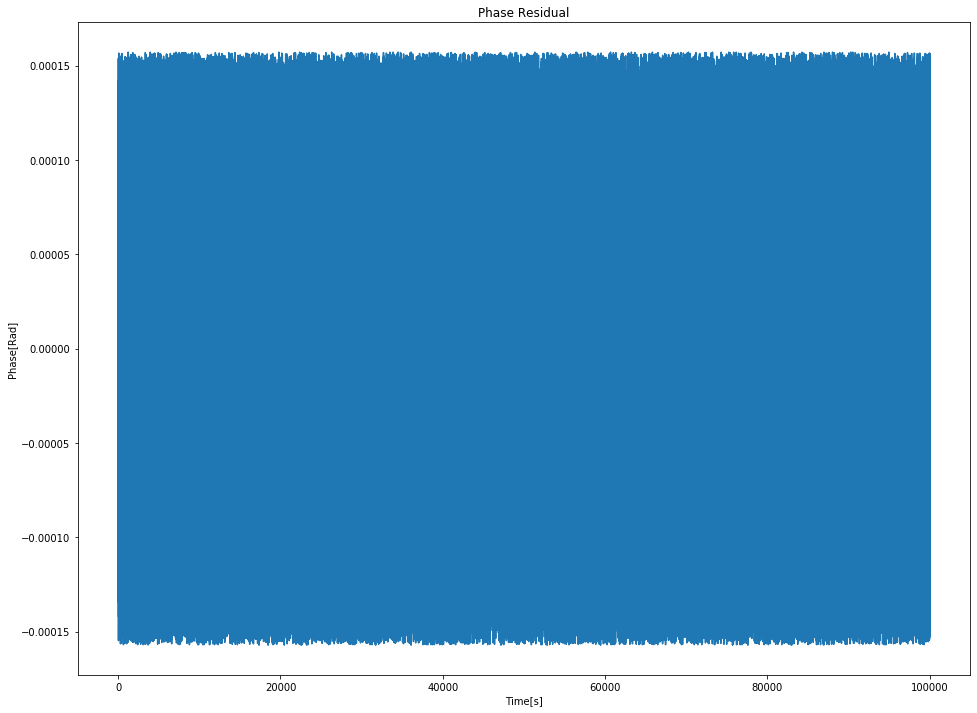

The MEAN is: 1.1385679e-07
The STANDARD DEVIATION is: 9.034672e-05
The MAX and MIN are: 0.00015711784, -0.00015711784


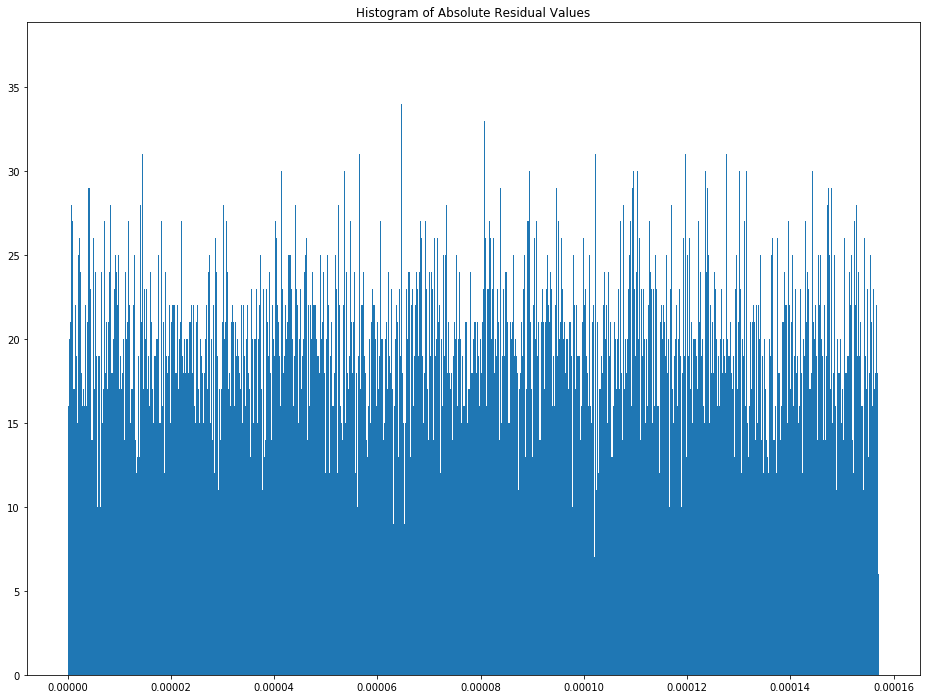

The MEAN is: 7.822045075503544e-05
The STANDARD DEVIATION is: 4.5211615647722416e-05
The MAX and MIN are: 0.00015722080166957753, 3.299756023977807e-10


In [17]:
# What does residual phase look like?
show_plot(np.arange(100000), phase.astype(dtype='float32')[:100000] - comp_phase_2, 'Time[s]', 'Phase[Rad]', 'Phase Residual')
print(get_statistics(phase.astype(dtype='float32')[:100000] - comp_phase_2))

plt.figure(figsize = (16, 12))
plt.title("Histogram of Absolute Residual Values")
plt.hist(np.abs(phase2[:100000] - comp_phase_2), bins=5000)
plt.show()

print(get_statistics(np.abs(phase2[:100000]-comp_phase_2)))

In [ ]:
# Summary of stats
print('phase')
print(get_statistics(phase.astype(dtype='float32')[:10000]))
print('\ncomp')
print(get_statistics(comp_phase_2)[:10000])
print('\nresidual')
print(get_statistics(phase.astype(dtype='float32')[:10000] - comp_phase_2))

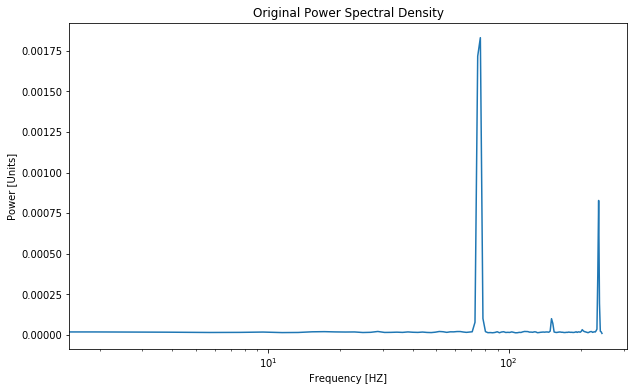


(Compressed) Power Spectrum
The MEAN is: 5.6542707e-05
The STANDARD DEVIATION is: 0.00022982506
The MAX and MIN are: 0.0018312403, 3.821409e-06


In [37]:
comp_freqs, comp_psd = signal.welch(comp_phase_2)

plt.figure(figsize=(10, 6))
plt.semilogx(comp_freqs*488, comp_psd)
plt.title('Original Power Spectral Density')
plt.xlabel('Frequency [HZ]')
plt.ylabel('Power [Units]')
plt.show()

print('\n(Compressed) Power Spectrum')
print(get_statistics(comp_psd))

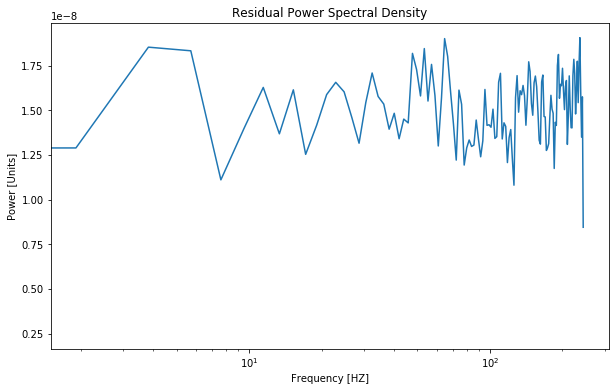


(Compressed) Power Spectrum
The MEAN is: 1.4999495e-08
The STANDARD DEVIATION is: 2.1618134e-09
The MAX and MIN are: 1.9057653e-08, 2.4802818e-09


In [30]:
comp_freqs, comp_psd = signal.welch(phase.astype(dtype='float32')[:10000] - comp_phase_2)

plt.figure(figsize=(10, 6))
plt.semilogx(comp_freqs*488, comp_psd)
plt.title('Residual Power Spectral Density')
plt.xlabel('Frequency [HZ]')
plt.ylabel('Power [Units]')
plt.show()

print('\n(Compressed) Power Spectrum')
print(get_statistics(comp_psd))

In [19]:
# Size of the true original and compressed files?

print('Original file size is: ', os.stat("phase32.fits").st_size)

print('Compressed file size is: ', os.stat("rice_phase2_comp.fits").st_size)

print(12003840/2557440)

Original file size is:  12003840
Compressed file size is:  2557440
4.693693693693693


This gives us a compression factor of approximately <b>4.69</b>
